# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
import math

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [2]:
# Creating a new column "title_length" using the length (number of characters) of each title
df["title_length"] = df["title"].str.len()
df

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


In [3]:
# Calculating mean, median and mode of "title_length" and adding them to my new dict
measurements = {}
mean_df = df["title_length"].mean()
median_df = df["title_length"].median()
mode_df = df["title_length"].mode()
measurements["Mean"] = round(float(mean_df), 2)
measurements["Median"] = round(float(median_df), 2)
measurements["Mode"] = round(float(mode_df), 2)

/tmp/ipykernel_2260/1040646850.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  measurements["Mode"] = round(float(mode_df), 2)


In [4]:
# Calculating range, variance and deviation of "title_length" and adding them to my dict
range_df = df["title_length"].max() - df["title_length"].min()
variance_df = df["title_length"].var()
deviation_df = df["title_length"].std()
measurements["Range"] = round(float(range_df), 2)
measurements["Variance"] = round(float(variance_df), 2)
measurements["Deviation"] = round(float(deviation_df), 2)

In [5]:
# Calculating skewness and kurtosis of "title_length" and adding them to my dict
skewness_df = df["title_length"].skew()
kurtosis_df = df["title_length"].kurt()
measurements["Skewness"] = round(float(skewness_df), 2)
measurements["Kurtosis"] = round(float(kurtosis_df), 2)

In [6]:
measurements

{'Mean': 15.48,
 'Median': 14.0,
 'Mode': 12.0,
 'Range': 67.0,
 'Variance': 72.11,
 'Deviation': 8.49,
 'Skewness': 1.53,
 'Kurtosis': 3.81}

In [7]:
# Longest and shortest title
longest_title = df.loc[df["title_length"].idxmax(), "title"]
shortest_title = df.loc[df["title_length"].idxmin(), "title"]
f"The longest title is {longest_title} and the shortest one is {shortest_title}"

'The longest title is Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb and the shortest one is M'

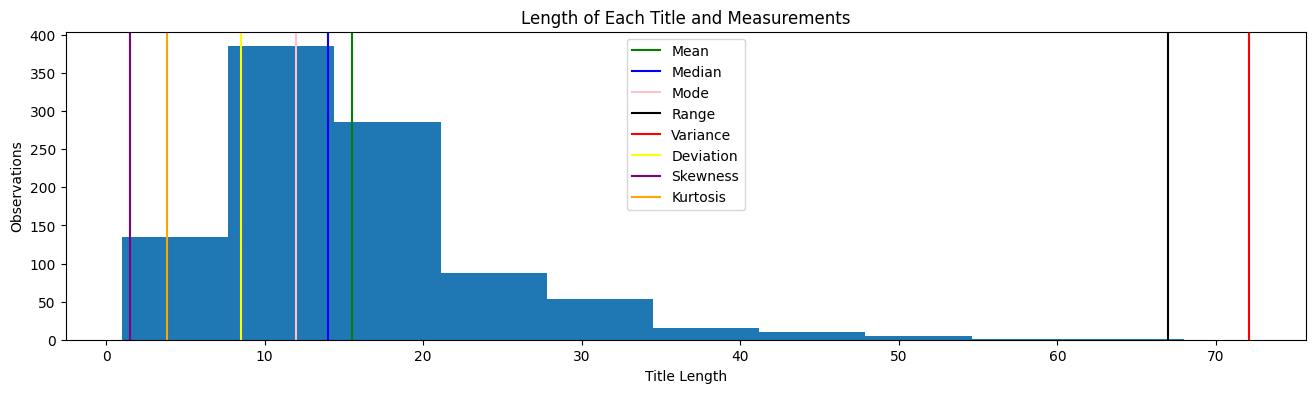

In [8]:
# Putting my results into a chart
plt.figure(figsize=(16, 4))
plt.hist(df["title_length"])
plt.axvline(measurements["Mean"], color = "green", label = "Mean")
plt.axvline(measurements["Median"], color = "blue", label = "Median")
plt.axvline(measurements["Mode"], color = "pink", label = "Mode")
plt.axvline(measurements["Range"], color = "black", label = "Range")
plt.axvline(measurements["Variance"], color = "red", label = "Variance")
plt.axvline(measurements["Deviation"], color = "yellow", label = "Deviation")
plt.axvline(measurements["Skewness"], color = "purple", label = "Skewness")
plt.axvline(measurements["Kurtosis"], color = "orange", label = "Kurtosis")
plt.legend()
plt.title("Length of Each Title and Measurements")
plt.xlabel("Title Length")
plt.ylabel("Observations")
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [9]:
# Creating list with first 5 values of df["title_length"]
values_list = df["title_length"].head(5).tolist()
values_list

[24, 13, 22, 15, 12]

In [10]:
# Calculating mean of values_list
mean_list = sum(values_list) / len(values_list)
mean_list

17.2

In [11]:
# Calculating the squared differences with respect to the mean
squared_differences = [(x - mean_list) ** 2 for x in values_list]
squared_differences_rounded = [round(x, 2) for x in squared_differences]
squared_differences_rounded

[46.24, 17.64, 23.04, 4.84, 27.04]

In [12]:
# Calculating variance (average of the squared differences)
variance_list = sum(squared_differences_rounded) / len(squared_differences_rounded)
variance_list

23.76

In [13]:
# Calculating Standard Deviation (square root of variance)
standard_deviation_list = math.sqrt(variance_list)
standard_deviation_list_rounded = round(standard_deviation_list, 2)
standard_deviation_list_rounded

4.87